<a href="https://colab.research.google.com/github/sahitiedupuganti/Cyber-Security-Assignments---024/blob/main/CSassignment2_024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Optional: Simple URL Filtering Example
import re

urls = [
    "http://secure-paypal-login.com/update",
    "https://cbt.ac.in/studentportal",
    "http://malicious-offer.ru",
    "https://github.com"
]

suspicious_pattern = r"(paypal|bank|login|update|verify|free|gift|prize|.ru|.tk)"
for url in urls:
    if re.search(suspicious_pattern, url.lower()):
        print(f"{url} → ⚠️ Suspicious")
    else:
        print(f"{url} → ✅ Safe")

http://secure-paypal-login.com/update → ⚠️ Suspicious
https://cbt.ac.in/studentportal → ✅ Safe
http://malicious-offer.ru → ⚠️ Suspicious
https://github.com → ✅ Safe


# ==============================
# WEB AND EMAIL FILTERING PROJECT
# Cyber Security Assignment – 2
# Author: Sahiti Edupuganti
# ==============================


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [3]:
# Step 2: Load Dataset
# Using the SMS Spam Collection dataset (simulates email filtering)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

In [4]:
# Step 3: Explore Data
print("Dataset preview:\n", df.head())
print("\nClass Distribution:\n", df['label'].value_counts())

Dataset preview:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class Distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


In [5]:
# Step 4: Encode Labels
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [6]:
# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

In [17]:
# Step 6: Build Pipeline (TF-IDF + RandomForest)
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=3000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [10]:
# Step 7: Train Model
print("\nTraining model... please wait.")
model.fit(X_train, y_train)


Training model... please wait.


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=3000, stop_words='english')),
                ('clf', RandomForestClassifier(random_state=42))])

In [12]:
# Step 8: Evaluate Model
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc*100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 98.39%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



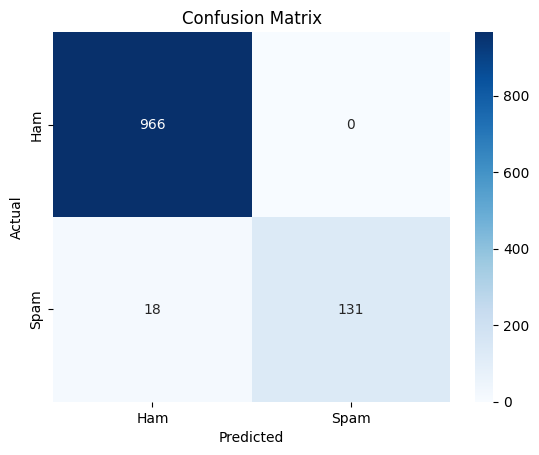

In [13]:
# Step 9: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Step 10: Test the Model
sample_emails = [
    "Congratulations! You’ve won a $1000 Amazon gift card. Click the link to claim now!",
    "Reminder: Your project meeting is at 3 PM today.",
    "Urgent! Verify your bank account immediately to avoid suspension."
]

predictions = model.predict(sample_emails)
for text, pred in zip(sample_emails, predictions):
    print(f"\nEmail: {text}\nPrediction: {'Spam' if pred==1 else 'Legit'}")


Email: Congratulations! You’ve won a $1000 Amazon gift card. Click the link to claim now!
Prediction: Spam

Email: Reminder: Your project meeting is at 3 PM today.
Prediction: Legit

Email: Urgent! Verify your bank account immediately to avoid suspension.
Prediction: Spam


In [15]:
# Step 11: Save the Model (Optional for GitHub)
import joblib
joblib.dump(model, "email_filter_model.pkl")
print("\nModel saved as email_filter_model.pkl")


Model saved as email_filter_model.pkl
